In [1]:
# Importing packages
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
# Load the data file 
data = pd.read_excel('/Users/sunayanababudas/Desktop/Crowdfunding_data_1000_projects.xlsx')

In [3]:
data

,Project_ID,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,school_district,school_county,school_charter,...,resource_type,poverty_level,grade_level,Goal,students_reached,total_donations,num_donors,funding_status,date_posted,date_expiration
0,1,45.310140,-93.807736,Monticello,MN,55362,NaN,Monticello Ind School Dist 882,Wright,f,...,Technology,moderate poverty,Grades PreK-2,887.15,12,856.83,7,completed,2015-01-01 00:00:00,2015-05-01 00:00:00
1,2,29.795216,-95.358101,Houston,TX,77009,urban,Houston Ind School District,Harris,f,...,Books,highest poverty,Grades 3-5,761.52,63,125.00,3,NotCompleted,2015-01-01 00:00:00,2015-04-30 00:00:00
2,3,37.754852,-122.426160,San Francisco,CA,94114,urban,San Francisco Unified Sch Dist,San Francisco,t,...,Supplies,highest poverty,Grades PreK-2,266.55,88,266.56,6,completed,2015-01-01 00:00:00,2015-05-01 00:00:00
3,4,36.297083,-119.789619,Lemoore,CA,93245,suburban,Lemoore Union Elem Sd,Kings,f,...,Supplies,high poverty,Grades 3-5,808.15,30,25.00,1,NotCompleted,2015-01-01 00:00:00,2015-04-30 00:00:00
4,5,33.946010,-118.223360,South Gate,CA,90280,suburban,Los Angeles Unif Sch Dist,Los Angeles,f,...,Other,high poverty,Grades 9-12,1296.65,92,1296.65,1,NotCompleted,2015-01-01 00:00:00,2015-05-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,27.712243,-97.425700,Corpus Christi,TX,78415,urban,Corpus Christi Ind Sch Dist,Nueces,f,...,Supplies,highest poverty,Grades PreK-2,168.40,20,168.40,2,completed,2015-01-05 00:00:00,2015-05-04 00:00:00
996,997,35.957050,-80.019836,High Point,NC,27262,urban,Guilford Co Schools,Guilford,f,...,Supplies,highest poverty,Grades 6-8,355.07,100,355.08,5,completed,2015-01-05 00:00:00,2015-05-05 00:00:00
997,998,42.156029,-71.565903,Dorchester,MA,2124,NaN,Boston Public School District,Suffolk,f,...,Supplies,highest poverty,Grades 6-8,1110.75,75,1083.40,19,completed,2015-01-05 00:00:00,2015-05-04 00:00:00
998,999,42.926026,-85.626478,Grand Rapids,MI,49506,urban,Grand Rapids Pub Sch Dist,Kent,f,...,Technology,highest poverty,Grades 9-12,2392.41,15,556.00,8,NotCompleted,2015-01-05 00:00:00,2015-05-05 00:00:00


In [4]:
# Creating df with 3 columns 

df = data[['Goal','num_donors','funding_status']]
df

,Goal,num_donors,funding_status
0,887.15,7,completed
1,761.52,3,NotCompleted
2,266.55,6,completed
3,808.15,1,NotCompleted
4,1296.65,1,NotCompleted
...,...,...,...
995,168.40,2,completed
996,355.07,5,completed
997,1110.75,19,completed
998,2392.41,8,NotCompleted


In [5]:
# Finding datatypes 
df.dtypes

Goal              float64
num_donors          int64
funding_status     object
dtype: object

In [6]:
# Replacing funding status data with binary 
df = df.replace({"funding_status":{"completed":1,"NotCompleted":0}})
df.head()

,Goal,num_donors,funding_status
0,887.15,7,1
1,761.52,3,0
2,266.55,6,1
3,808.15,1,0
4,1296.65,1,0


In [7]:
# Cleaning up the data
df["funding_status"] = df["funding_status"].astype("int")
df

,Goal,num_donors,funding_status
0,887.15,7,1
1,761.52,3,0
2,266.55,6,1
3,808.15,1,0
4,1296.65,1,0
...,...,...,...
995,168.40,2,1
996,355.07,5,1
997,1110.75,19,1
998,2392.41,8,0


In [8]:
df.dtypes

Goal              float64
num_donors          int64
funding_status      int64
dtype: object

In [9]:
# Drop NaN values if any
df.dropna()
df

,Goal,num_donors,funding_status
0,887.15,7,1
1,761.52,3,0
2,266.55,6,1
3,808.15,1,0
4,1296.65,1,0
...,...,...,...
995,168.40,2,1
996,355.07,5,1
997,1110.75,19,1
998,2392.41,8,0


,Goal,num_donors,funding_status
668,436.29,1,0
174,1897.68,0,0
420,504.04,2,0
434,420.52,1,0
520,172.55,4,1


,Goal,num_donors,funding_status
6,399.84,5,1
10,488.65,6,1
14,169.92,2,1
16,527.02,0,0
24,275.72,3,1
...,...,...,...
976,634.09,9,1
977,224.99,3,1
979,4439.62,3,0
983,247.26,2,0


In [14]:
# Making a random decision tree

train, test = train_test_split(df, test_size = 0.3)
train

,Goal,num_donors,funding_status
433,1205.49,3,0
592,596.46,7,1
265,293.52,2,1
70,341.59,2,0
288,553.40,0,0
...,...,...,...
262,168.11,5,1
122,1138.40,0,0
18,359.36,2,1
697,612.05,0,0


In [15]:
test

,Goal,num_donors,funding_status
37,290.99,4,1
878,2376.34,2,0
853,705.64,0,0
68,806.13,4,1
287,428.60,11,1
...,...,...,...
271,2002.07,18,1
345,1346.41,3,0
692,1474.02,1,0
647,237.56,2,0


In [16]:
# Training Decision Tree model 
clf = tree.DecisionTreeClassifier()

In [18]:
clf =clf.fit(train[['Goal','num_donors']],train[['funding_status']] )

[Text(123.23528761061947, 212.71304347826086, 'X[1] <= 1.5\ngini = 0.485\nsamples = 700\nvalue = [290, 410]'),
 Text(38.14646017699115, 203.2591304347826, 'X[1] <= 0.5\ngini = 0.301\nsamples = 222\nvalue = [181, 41]'),
 Text(35.18362831858407, 193.80521739130435, 'gini = 0.0\nsamples = 116\nvalue = [116, 0]'),
 Text(41.10929203539823, 193.80521739130435, 'X[0] <= 321.885\ngini = 0.474\nsamples = 106\nvalue = [65, 41]'),
 Text(13.332743362831858, 184.3513043478261, 'X[0] <= 204.205\ngini = 0.401\nsamples = 36\nvalue = [10, 26]'),
 Text(10.36991150442478, 174.89739130434782, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(16.295575221238938, 174.89739130434782, 'X[0] <= 230.63\ngini = 0.496\nsamples = 22\nvalue = [10, 12]'),
 Text(5.925663716814159, 165.44347826086957, 'X[0] <= 207.7\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(2.9628318584070796, 155.98956521739132, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(8.888495575221238, 155.98956521739132, 'X[0] <= 210.275\ngini 

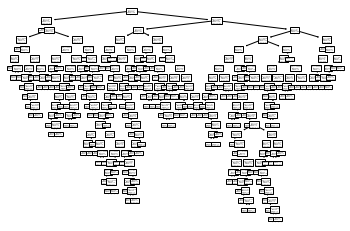

In [19]:
tree.plot_tree(clf)

ModuleNotFoundError: No module named 'graphviz'

In [25]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Users\\Vivek Singh\\Downloads\\DSS for BI Videos\\Module 5\\graphviz\\Graphviz\\bin'

In [26]:
import graphviz

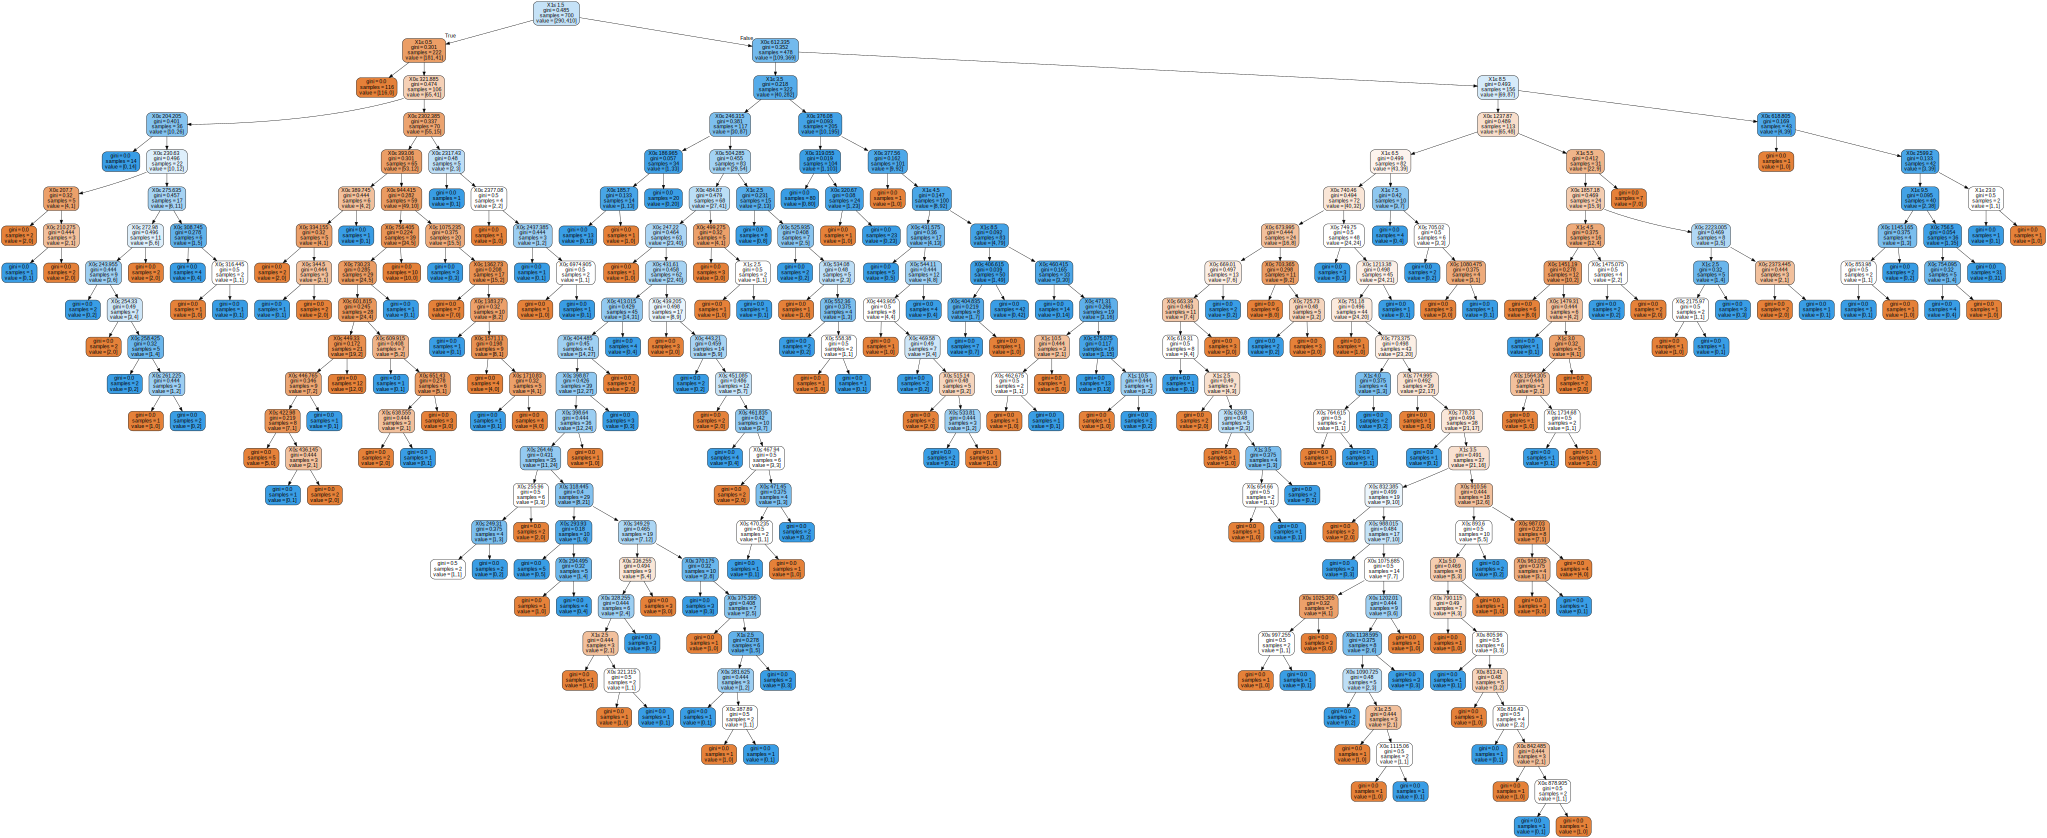

In [27]:
graph_viz_data = tree.export_graphviz(clf, out_file=None, 
...                      filled=True, rounded=True,  
...                      special_characters=True)  
graph = graphviz.Source(graph_viz_data)  
graph 

In [28]:
# Predicting 
clf.predict(test[['Goal','num_donors']])

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0])

In [29]:
test[['funding_status']]

,funding_status
37,1
878,0
853,0
68,1
287,1
...,...
271,1
345,0
692,0
647,0


In [31]:
# Confusion Matrix
import sklearn
sklearn.metrics.confusion_matrix(test[['funding_status']], clf.predict(test[['Goal','num_donors']]))

array([[ 85,  32],
       [ 31, 152]])

In [32]:
# Accuracy score with Goal, num_donors and funding status
sklearn.metrics.accuracy_score(test[['funding_status']], clf.predict(test[['Goal','num_donors']]))

0.79

In [33]:
# Testing accuracy score using new dataframe

df_new = df[['Goal','funding_status']]
df_new

,Goal,funding_status
0,887.15,1
1,761.52,0
2,266.55,1
3,808.15,0
4,1296.65,0
...,...,...
995,168.40,1
996,355.07,1
997,1110.75,1
998,2392.41,0


In [34]:
# New train and test
train_new, test_new = train_test_split(df_new, test_size = 0.3)

In [35]:
train_new

,Goal,funding_status
14,169.92,1
284,1988.82,0
858,1480.02,0
630,937.81,0
908,594.11,1
...,...,...
575,523.39,1
328,588.53,1
39,1472.96,1
103,173.92,1


In [36]:
test_new

,Goal,funding_status
47,489.61,1
361,471.64,1
875,266.20,1
292,540.78,1
649,1578.49,0
...,...,...
855,1063.74,1
406,527.75,0
492,348.15,0
472,2375.66,1


In [37]:
# Training Decision Tree model 
clf_new = tree.DecisionTreeClassifier()

In [38]:
clf_new =clf_new.fit(train[['Goal']],train[['funding_status']] )

[Text(187.3144581911263, 214.0425, 'X[0] <= 611.095\ngini = 0.485\nsamples = 700\nvalue = [290, 410]'),
 Text(84.03565699658704, 207.2475, 'X[0] <= 311.79\ngini = 0.417\nsamples = 445\nvalue = [132, 313]'),
 Text(19.939453924914677, 200.4525, 'X[0] <= 194.585\ngini = 0.295\nsamples = 178\nvalue = [32, 146]'),
 Text(10.969556313993175, 193.6575, 'X[0] <= 186.245\ngini = 0.147\nsamples = 50\nvalue = [4, 46]'),
 Text(9.141296928327646, 186.8625, 'X[0] <= 185.7\ngini = 0.202\nsamples = 35\nvalue = [4, 31]'),
 Text(7.313037542662117, 180.0675, 'X[0] <= 157.3\ngini = 0.161\nsamples = 34\nvalue = [3, 31]'),
 Text(3.6565187713310583, 173.2725, 'X[0] <= 157.025\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(1.8282593856655291, 166.4775, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(5.484778156996588, 166.4775, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(10.969556313993175, 173.2725, 'X[0] <= 172.365\ngini = 0.124\nsamples = 30\nvalue = [2, 28]'),
 Text(9.141296928327646, 166.4775

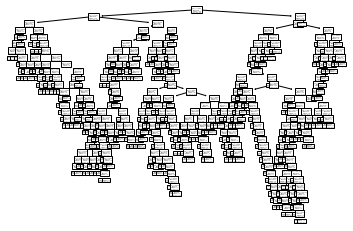

In [39]:
tree.plot_tree(clf_new)

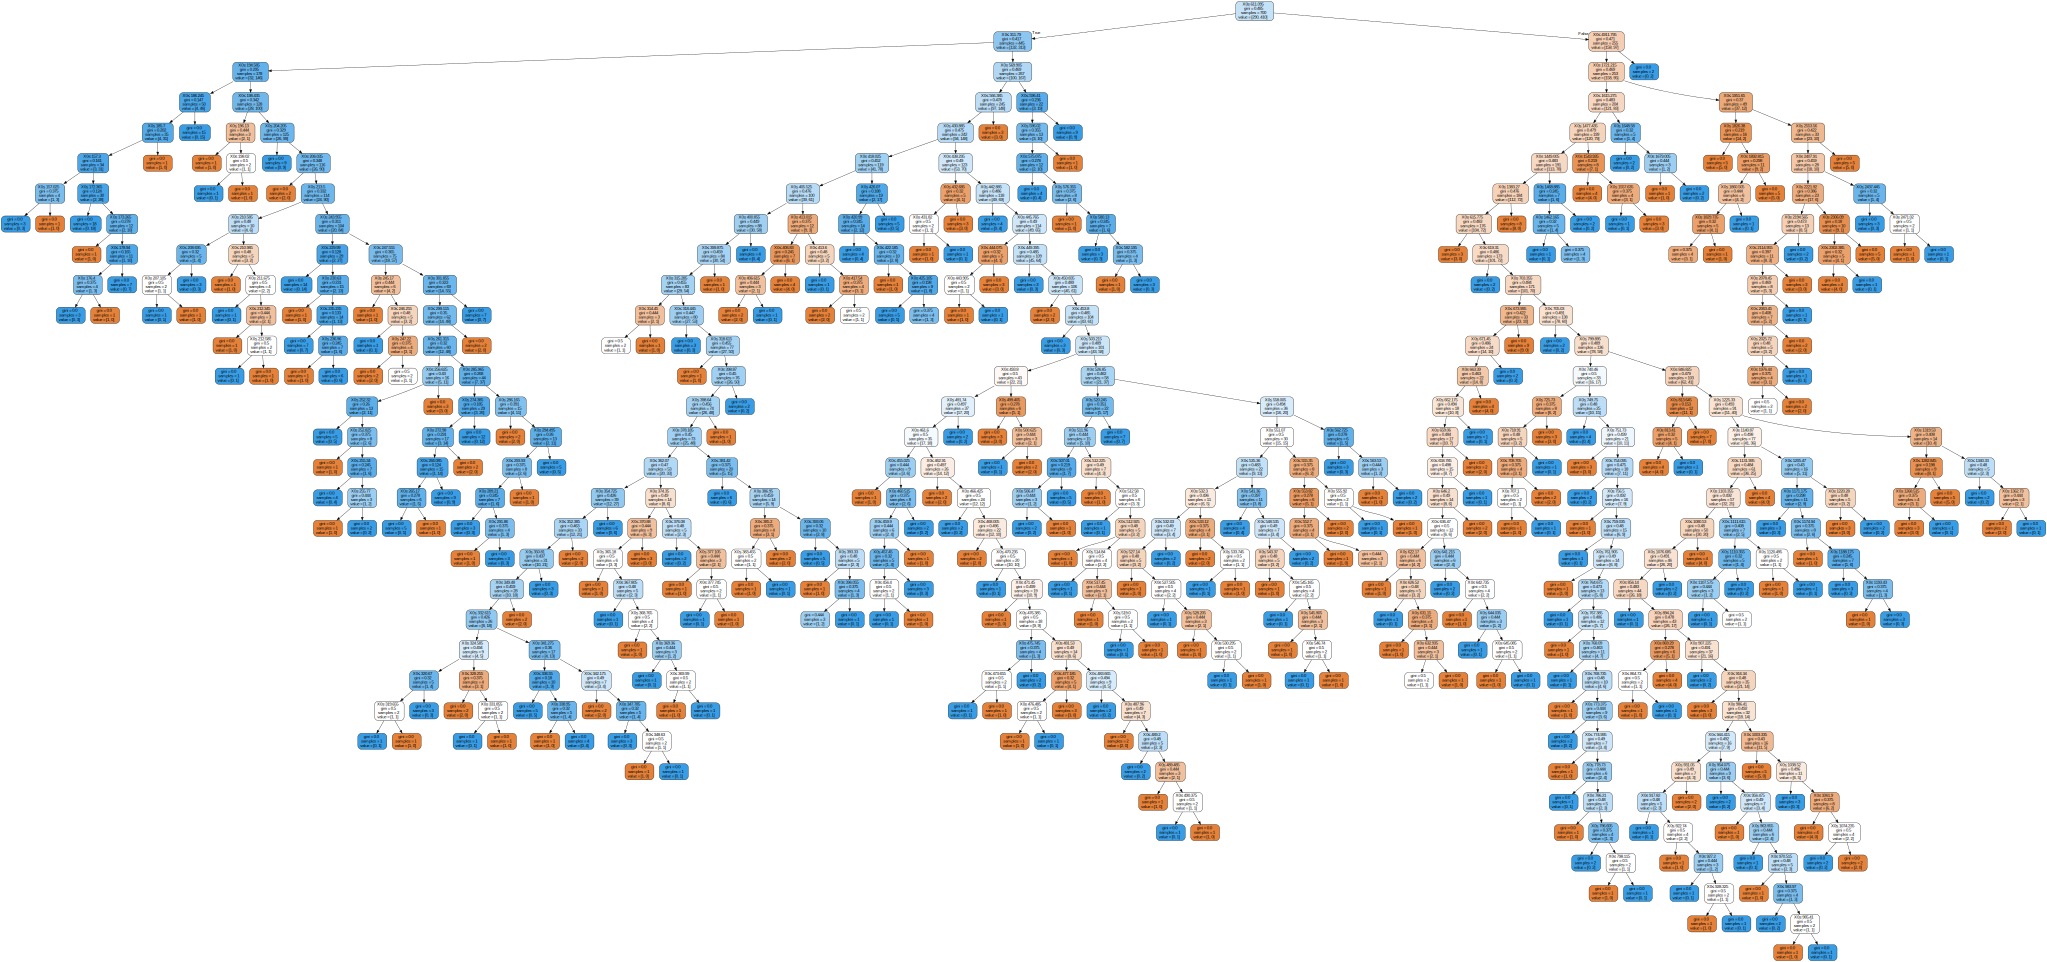

In [40]:
# Plotting the tree
graph_viz_new = tree.export_graphviz(clf_new, out_file=None, 
...                      filled=True, rounded=True,  
...                      special_characters=True)  
graph_new = graphviz.Source(graph_viz_new)  
graph_new

In [44]:
# Predicting with new df
clf_new.predict(test_new[['Goal']])

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0])

In [46]:
predicted_values_new=clf_new.predict(test_new[['Goal']])

In [47]:
test_new[['funding_status']]

,funding_status
47,1
361,1
875,1
292,1
649,0
...,...
855,1
406,0
492,0
472,1


In [49]:
# Confusion matrix with new df
sklearn.metrics.confusion_matrix(test_new[['funding_status']], clf_new.predict(test_new[['Goal']]))

array([[103,  22],
       [ 19, 156]])

In [50]:
# Accuracy score with Goal and funding status
sklearn.metrics.accuracy_score(test_new[['funding_status']], clf_new.predict(test_new[['Goal']]))

0.8633333333333333